In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.groupby(by='label').count()

,message
label,
ham,4825
spam,747


In [5]:
#Since percentage of spam is very less compare to ham we can see that is is imbalance class issue.
#Any how lets continue with same dataset to test

In [6]:
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk import word_tokenize
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [7]:
wnl=WordNetLemmatizer()

In [8]:
corpus_words=[]
for i in range(len(data['message'])):
    corpus=re.sub('[^a-zA-Z0-9]',' ',data['message'][i])
    corpus=corpus.lower()
    corpus=corpus.split()# We will get list of words here
    corpus=[wnl.lemmatize(word) for word in corpus if word not in stopwords.words('english')]
    corpus=' '.join(corpus)
    corpus_words.append(corpus)
    

In [9]:
corpus_words

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune',
 'winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6days 16 tsandcs apply reply

In [10]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
#cv=CountVectorizer()TfidfVectorizer
tf=TfidfVectorizer()

In [12]:
corpsofwords=tf.fit_transform(corpus_words).toarray()

In [13]:
corpsofwords

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
le=LabelEncoder()

In [16]:
ham_spam=le.fit_transform(data['label'])

In [17]:
ham_spam

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [19]:
X_train,X_test,y_train,y_test=train_test_split(corpsofwords,ham_spam,test_size=0.20,random_state=42)

In [20]:
naive_bayes=MultinomialNB()

In [21]:
naive_bayes.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred=naive_bayes.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [24]:
cm

array([[966,   0],
       [ 31, 118]], dtype=int64)

In [25]:
import seaborn as sns

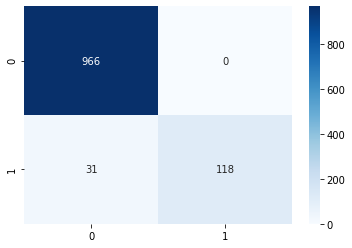

In [26]:
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.4g')


In [27]:
from sklearn.metrics import accuracy_score
acs=accuracy_score(y_test,y_pred)

In [28]:
print('Accuracy Score is {} %'.format(round(acs,3)*100))

Accuracy Score is 97.2 %
